In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/FIA - DATA ENGINEER /BASES/projeto-ia-datasets/house-prices-train.csv")

In [3]:
df.shape

(1460, 81)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [68]:
#carregando variáveis com contensão de lista

cat_vars = df.select_dtypes(include= "object").columns.to_list()
target = "SalePrice"
num_vars = [col for col in df.columns if col not in cat_vars+ ["Id",target]]
features = cat_vars + num_vars

In [69]:
X = df[num_vars]
y = df[target]

In [70]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [71]:
from sklearn.model_selection import  train_test_split

In [72]:
X_train, X_teste, y_train, y_teste = train_test_split(X,y, test_size= 0.2, random_state = 42)

In [22]:
!pip install feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 7.8 MB/s eta 0:00:00


In [64]:
from feature_engine.imputation import ArbitraryNumberImputer
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [26]:
model_lr = Pipeline(steps=[
    ("numeric_imputer", ArbitraryNumberImputer(variables=num_vars, arbitrary_number= -999)),
    ("scale", SklearnTransformerWrapper(transformer= StandardScaler(), variables = num_vars)),
    ("lr", LinearRegression())
])

In [28]:
model_lr.fit(X_train,y_train)

Pipeline(steps=[('numeric_imputer',
                 ArbitraryNumberImputer(arbitrary_number=-999,
                                        variables=['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', '...
                                                      'YearRemodAdd',
                                                      'MasVnrArea',
                                                      'BsmtFinSF1',
                                                      'BsmtFinSF2', 'BsmtUnfSF',
                                                      'TotalBsmtSF', '1stFlrSF',
                                                      '2ndFlrSF',
                                                      'LowQualFinSF',
                                                      'GrLivArea',
                                                      'BsmtFullBath',
                                                      'BsmtHalfBath',
                                                      'FullBath', 'HalfBath',
                                                      'BedroomAbvGr',
                                                      'KitchenAbvGr',
                                                      'TotRmsAbvGrd',
                                                      'Fireplaces',
                                                      'GarageYrBlt',
                                                      'GarageCars',
                                                      'GarageArea',
                                                      'WoodDeckSF',
                                                      'OpenPorchSF',
                                                      'EnclosedPorch', ...])),
                ('lr', LinearRegression())])

In [43]:
y_previsto = model_lr.predict(X_teste)
y_previsto_train = model_lr.predict(X_train)

<Axes: xlabel='SalePrice'>

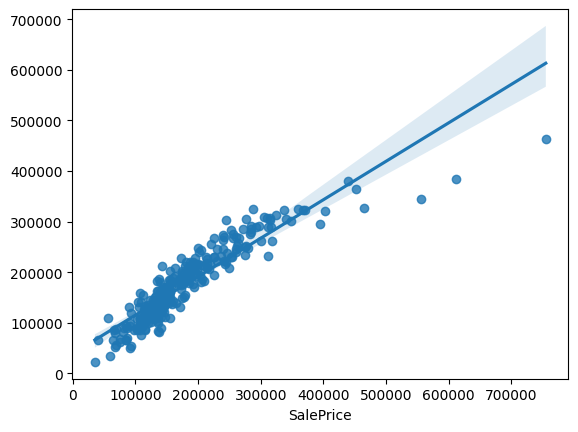

In [34]:
#Gráfico comparação previsto com real
##Possível observar que modelo consegue prever bem valores menores e a medida que o modelo
##teste valore maiores, erro na predição aumenta
sns.regplot(x = y_teste, y= y_previsto)

<Axes: xlabel='SalePrice'>

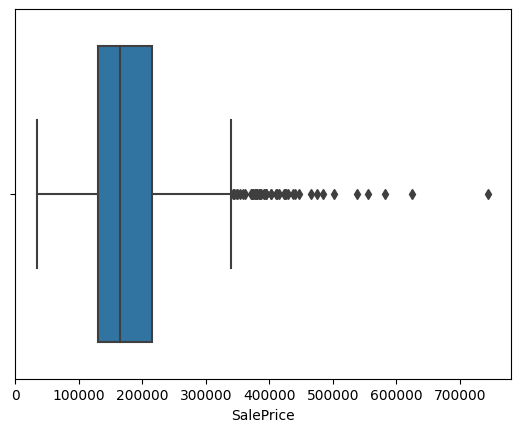

In [37]:
# Base com vários outliers
sns.boxplot(x= y_train)

# Métricas

In [45]:
#R2
# Em que porcentagem o seu modelo consegue interpretar (acertividade)
from sklearn.metrics import r2_score
r2_noteste = r2_score(y_teste, y_previsto)
r2_notreino = r2_score(y_train, y_previsto_train)
print(f"R2 no teste {r2_noteste}")
print(f"R2 no treino {r2_notreino}")

R2 no teste 0.8290694913321144
R2 no treino 0.8093738209116383


In [59]:
#MAE
# Quanto em média absoluta o modelo erra ?
from sklearn.metrics import mean_absolute_error
mae_noteste = mean_absolute_error(y_teste, y_previsto)
mae_notreino = mean_absolute_error(y_train, y_previsto_train)
print(f"mae no teste {mae_noteste}")
print(f"mae no treino {mae_notreino}")
print(df[target].mean())
print(df[target].std())

mae no teste 22141.62943159128
mae no treino 20845.523758521693
180921.19589041095
79442.50288288662


In [49]:
#MSE
from sklearn.metrics import mean_squared_error
mse_noteste = mean_squared_error(y_teste, y_previsto)
mse_notreino = mean_squared_error(y_train, y_previsto_train)
print(f"mse no teste {mse_noteste}")
print(f"mse no treino {mse_notreino}")

mse no teste 1311092760.243109
mse no treino 1136999448.8756864


In [51]:
#RMSE
#sofre menos penalização com os outliers
from sklearn.metrics import mean_squared_error
rmse_noteste = mean_squared_error(y_teste, y_previsto, squared = False)
rmse_notreino = mean_squared_error(y_train, y_previsto_train, squared = False)
print(f"rmse no teste {rmse_noteste}")
print(f"rmse no treino {rmse_notreino}")

rmse no teste 36209.014902964554
rmse no treino 33719.42242796704


In [54]:
#RMSLE
#rmsle no treino muito pequeno, valor negativo
from sklearn.metrics import mean_squared_log_error
rmsle_noteste = mean_squared_log_error(y_teste, y_previsto)
#rmsle_notreino = mean_squared_log_error(y_train, y_previsto_train)
print(f"rmse no teste {rmsle_noteste}")
#print(f"rmse no treino {rmsle_notreino}")

rmse no teste 0.03040650380055865


In [55]:
#Max error

#erro máximo que pode atingir
from sklearn.metrics import max_error
max_error_noteste = max_error(y_teste, y_previsto)
max_error_notreino = max_error(y_train, y_previsto_train)
print(f"max error no teste {max_error_noteste}")
print(f"max erorr no treino {max_error_notreino}")

max error no teste 290890.0881130221
max erorr no treino 436516.95579976705


In [56]:
#MedAE
from sklearn.metrics import median_absolute_error
MedAE_noteste = median_absolute_error(y_teste, y_previsto)
MedAE_notreino = median_absolute_error(y_train, y_previsto_train)
print(f"median absolute error no teste {MedAE_noteste}")
print(f"median absolute error no treino {MedAE_notreino}")

median absolute error no teste 16517.130730214063
median absolute error no treino 15064.638142537122


In [57]:
#MAPE
#Erro médio absoluto em percentual, o quanto o modelo esta errando

from sklearn.metrics import mean_absolute_percentage_error
MAPE_noteste = mean_absolute_percentage_error(y_teste, y_previsto)
MAPE_notreino = mean_absolute_percentage_error(y_train, y_previsto_train)
print(f"MAPE no teste {MAPE_noteste}")
print(f"MAPE no treino {MAPE_notreino}")

#MAPE = 0.12 - predição alta

MAPE no teste 0.12803732713762903
MAPE no treino 0.12355802954801244


# em produção

In [60]:
X_teste["valor_casa"] = model_lr.predict(X_teste)

In [61]:
X_teste["mais"] = X_teste["valor_casa"]*(1+ 0.13)
X_teste["menos"] = X_teste["valor_casa"]*(1- 0.13)

In [62]:
X_teste

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,valor_casa,mais,menos
892,20,70.0,8414,6,8,1963,2003,0.0,663,0,...,0,0,0,0,0,2,2006,150979.143430,170606.432076,131351.854784
1105,60,98.0,12256,8,5,1994,1995,362.0,1032,0,...,0,0,0,0,0,4,2010,312057.685577,352625.184702,271490.186452
413,30,56.0,8960,5,6,1927,1950,0.0,0,0,...,130,0,0,0,0,3,2010,116013.512438,131095.269054,100931.755821
522,50,50.0,5000,6,7,1947,1950,0.0,399,0,...,36,0,0,0,0,10,2006,181493.381360,205087.520937,157899.241783
1036,20,89.0,12898,9,5,2007,2008,70.0,1022,0,...,0,0,0,0,0,9,2009,302444.177262,341761.920307,263126.434218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,30,50.0,5925,4,7,1937,2000,435.0,168,0,...,0,0,0,0,0,3,2007,131014.037133,148045.861960,113982.212305
1361,20,124.0,16158,7,5,2005,2005,16.0,1274,0,...,0,0,0,0,0,6,2009,240271.548388,271506.849679,209036.247098
802,60,63.0,8199,7,5,2005,2005,0.0,648,0,...,0,0,0,0,0,10,2008,213232.530992,240952.760021,185512.301963
651,70,60.0,9084,4,5,1940,1950,0.0,0,0,...,0,0,0,0,0,10,2009,99770.591894,112740.768840,86800.414948


In [73]:
model_rf = Pipeline(steps=[
    ("numeric_imputer", ArbitraryNumberImputer(variables=num_vars, arbitrary_number= -999)),
    ("scale", SklearnTransformerWrapper(transformer= StandardScaler(), variables = num_vars)),
    ("rf", RandomForestRegressor())
])

In [74]:
model_rf.fit(X_train, y_train)

Pipeline(steps=[('numeric_imputer',
                 ArbitraryNumberImputer(arbitrary_number=-999,
                                        variables=['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', '...
                                                      'YearRemodAdd',
                                                      'MasVnrArea',
                                                      'BsmtFinSF1',
                                                      'BsmtFinSF2', 'BsmtUnfSF',
                                                      'TotalBsmtSF', '1stFlrSF',
                                                      '2ndFlrSF',
                                                      'LowQualFinSF',
                                                      'GrLivArea',
                                                      'BsmtFullBath',
                                                      'BsmtHalfBath',
                                                      'FullBath', 'HalfBath',
                                                      'BedroomAbvGr',
                                                      'KitchenAbvGr',
                                                      'TotRmsAbvGrd',
                                                      'Fireplaces',
                                                      'GarageYrBlt',
                                                      'GarageCars',
                                                      'GarageArea',
                                                      'WoodDeckSF',
                                                      'OpenPorchSF',
                                                      'EnclosedPorch', ...])),
                ('rf', RandomForestRegressor())])

In [75]:
rf_y_previsto = model_rf.predict(X_teste)

In [78]:
#MAPE
#Erro médio absoluto em percentual, o quanto o modelo esta errando

from sklearn.metrics import mean_absolute_percentage_error
MAPE_noteste = mean_absolute_percentage_error(y_teste, rf_y_previsto)
#MAPE_notreino = mean_absolute_percentage_error(y_train, y_previsto_train)
print(f"MAPE no teste {MAPE_noteste}")
#print(f"MAPE no treino {MAPE_notreino}")

MAPE no teste 0.10690765455698595


In [79]:
#MAE
# Quanto em média absoluta o modelo erra ?
from sklearn.metrics import mean_absolute_error
mae_noteste = mean_absolute_error(y_teste, rf_y_previsto)
#mae_notreino = mean_absolute_error(y_train, y_previsto_train)
print(f"mae no teste {mae_noteste}")
#print(f"mae no treino {mae_notreino}")
print(df[target].mean())
print(df[target].std())

mae no teste 17862.37761415525
180921.19589041095
79442.50288288662
